<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">
Lab6: การจำแนกประเภทของความคิดเห็น (Comment Classification)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้:</h1>

In [1]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt
# นำเข้าไลบรารี matplotlib.dates โดยตั้งชื่อว่า mdates
import pandas as pd
# ปิดการแจ้งเตือน
import warnings
warnings.filterwarnings('ignore')

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;">1.1 นำข้อมูลเข้า</h1>

In [2]:
data = pd.read_csv("Comment.csv") # อ่านไฟล์ csv ชื่อ 'Comment.csv' เราจะได้ตารางของข้อมูล (dataframe) เก็บไว้ในตัวแปรชื่อ data
data.head() # แสดงผล dataframe 5 แถวแรก

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


<h1 style="font-size: 18px;">1.2 สำรวจข้อมูล</h1>

In [3]:
data.info() # แสดงรายละเอียดของแต่ละคอลัมน์ใน data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [4]:
# ตรวจสอบข้อมูลที่หายไป
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [5]:
# ตรวจสอบว่ามีแถวใดบ้างในข้อมูลที่ทุกคอลัมน์ที่กำหนดมีค่าเท่ากับ 1 ทั้งหมด
columns_to_check = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
all_one_rows = data[data[columns_to_check].all(axis=1)]
all_one_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1017 to 159400
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             31 non-null     object
 1   comment_text   31 non-null     object
 2   toxic          31 non-null     int64 
 3   severe_toxic   31 non-null     int64 
 4   obscene        31 non-null     int64 
 5   threat         31 non-null     int64 
 6   insult         31 non-null     int64 
 7   identity_hate  31 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.2+ KB


In [6]:
all_one_rows.head() # แสดงผล dataframe 5 แถวแรก

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1
1312,039296aa294ee10b,"SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!",1,1,1,1,1,1
7299,1368c10281978876,"You're a stupid cunt \n\nFuck you dumb arse, y...",1,1,1,1,1,1
13648,2405c66d017f139e,Bitch \n\nYou are a little bitch. I fuckin spe...,1,1,1,1,1,1
13964,24d2b50726b67167,I am going to murder ZimZalaBim ST47 for being...,1,1,1,1,1,1


In [7]:
data.head() # แสดงผล dataframe 5 แถวแรก

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


<h1 style="font-size: 18px;">1.3 คัดเลือกข้อมูล (data cleaning)</h1>

In [8]:
import re # นำเข้าไลบารี re

In [9]:
# ฟังก์ชันที่ใช้ในการ clean data
def clean_text(text):
    # ลบ HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # ลบ web links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # ลบตัวอักษรพิเศษ
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # ใส่ช่องว่างให้กับคำพิเศษ เช่น (e.g., "ie", "eg")
    text = re.sub(r'(\s)([iI][eE]|[eE][gG])(\s)', r' \2 ', text)

    # ลบช่องว่างที่เกินมา (white space)
    text = " ".join(text.split())

    return text.lower() # ทำให้อักษรทั้งหมดเป็นพิมพ์เล็ก

In [10]:
# ทดลองใช้กับ text ตัวอย่าง
texts = ["\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of 'types of accidents'  -I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport"]
cleaned_texts = [clean_text(text) for text in texts]
print(cleaned_texts)

['more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up it s listed in the relevant form eg wikipedia good article nominations transport']


In [11]:
# ทำ data cleaning
data['Cleaned_Comments'] = data['comment_text'].apply(clean_text)
data.head() # แสดงผล dataframe 5 แถวแรก

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Cleaned_Comments
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d aww he matches this background colour i m se...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i m really not trying to edit war it s...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i can t make any real suggestions on impr...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...


เนื่องจากจำนวน sample ที่มากเกินไป ทำให้โมเดลใช้เวลาเทรนค่อนข้างนาน ในแลปนี้เราจึงจะลด sample ของข้อมูลลง

In [12]:
target_labels = [col for col in data.columns if data[col].dtypes == 'int64']
target_labels

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [13]:
# สร้างลิสต์เพื่อเก็บข้อมูลที่ถูกสุ่ม
dfs = []

# วนลูปตามคลาสและสุ่ม 2000 ตัวอย่างสำหรับแต่ละคลาส
for label in target_labels:
    # เลือกข้อมูลที่มีคลาสเท่ากับ 1
    label_data = data[data[label] == 1]
    # สุ่มข้อมูลและตรวจสอบว่าจำนวนข้อมูลที่สุ่มมีมากพอหรือไม่
    sampled_label_data = label_data.sample(n=min(2000, len(label_data)), replace=True, random_state=42)
    # เพิ่มข้อมูลที่ถูกสุ่มลงในลิสต์
    dfs.append(sampled_label_data)

# จัดการกับคอมเมนต์ที่ไม่มี toxic (ค่าทุกคลาสเป็น 0)
clean_data = data[(data[target_labels] == 0).all(axis=1)]
# สุ่มข้อมูลคอมเมนต์ดี
sampled_clean_data = clean_data.sample(n=min(2000, len(clean_data)), replace=True, random_state=42)
# เพิ่มข้อมูลคอมเมนต์ดีที่ถูกสุ่มลงในลิสต์
dfs.append(sampled_clean_data)

# รวมข้อมูลที่ถูกสุ่มทั้งหมดและสับเปลี่ยน
data = pd.concat(dfs, axis=0).drop_duplicates().sample(frac=1, random_state=1)
# รีเซ็ต index
data = data.reset_index(drop=True)
# ตรวจสอบขนาดของ DataFrame สุดท้าย
print("ขนาดของ DataFrame สุดท้าย:", data.shape)

ขนาดของ DataFrame สุดท้าย: (7866, 9)


<h1 style="font-size: 18px;">1.4 แสดงผล/นำเสนอข้อมูล (data visualization)</h1>

In [14]:
from wordcloud import WordCloud, STOPWORDS # นำเข้าไลบรารี wordcloud เพื่อเรียกใช้ WordCloud, STOPWORDS

In [15]:
# ฟังก์ชันที่ใช้ในการสร้าง wordcloud
def generate_wordcloud(text,Title):
    wordcloud = WordCloud(width=800, height=400,stopwords=set(STOPWORDS), background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

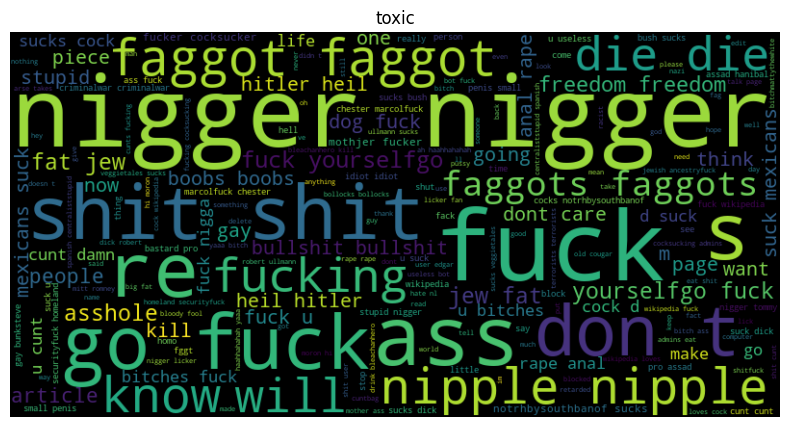

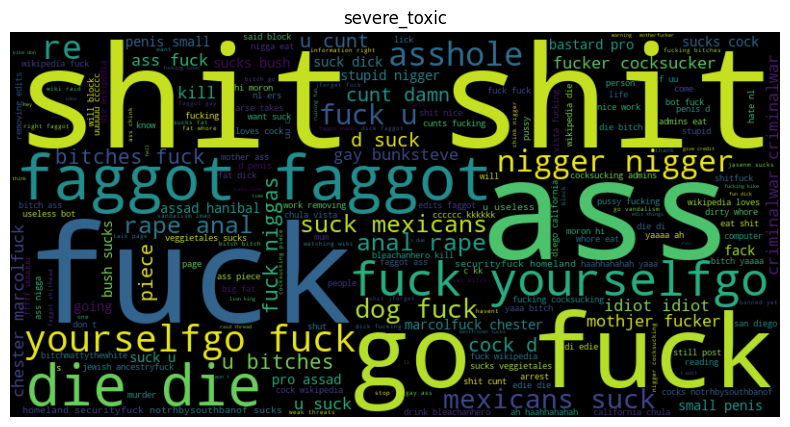

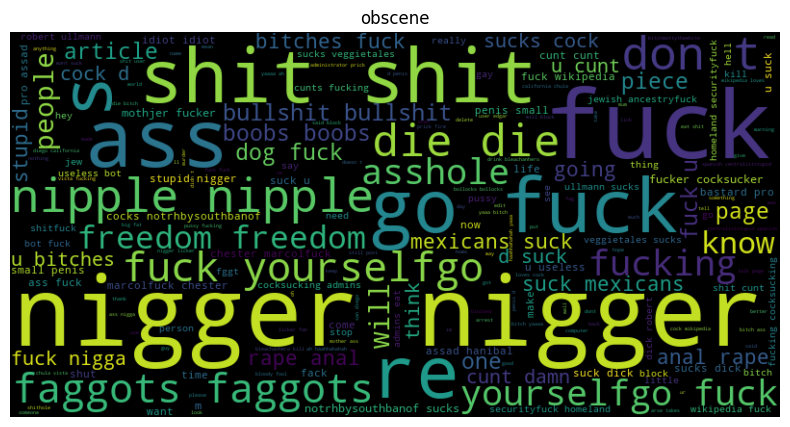

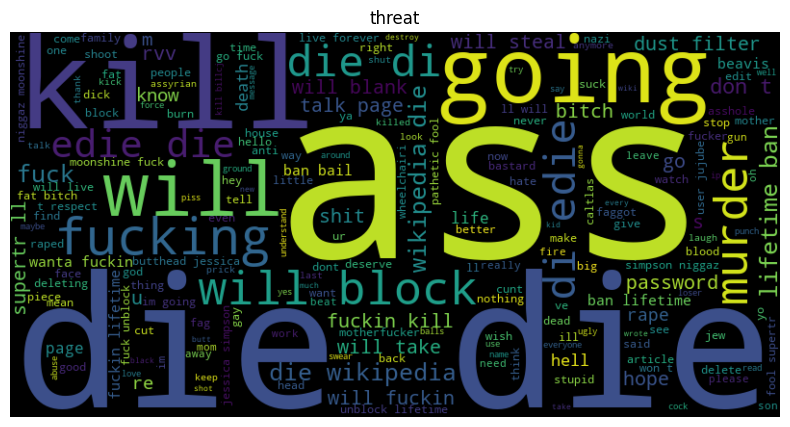

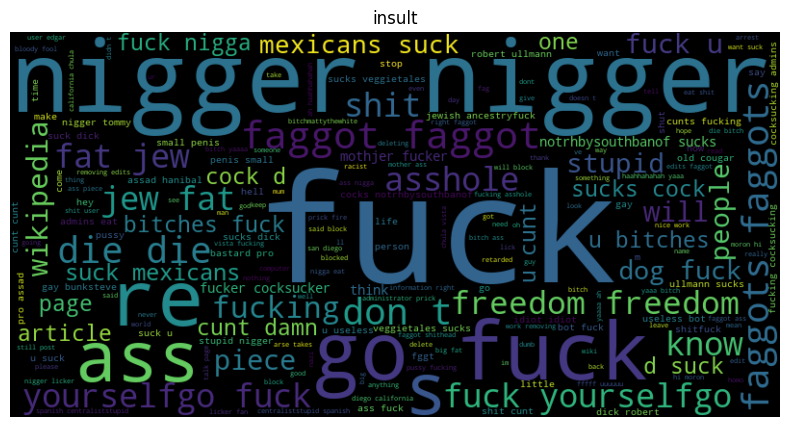

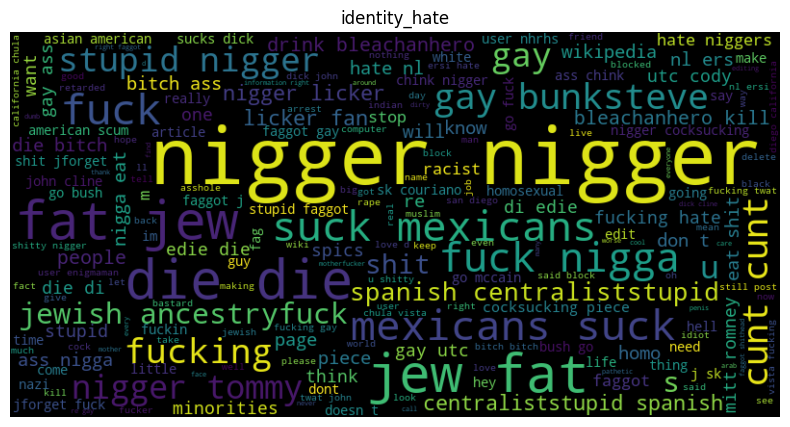

In [16]:
# พลอต wordcloud สำหรับแต่ละ label
for label in target_labels:
    text = ' '.join(data[data[label] == 1]['Cleaned_Comments'].values)
    generate_wordcloud(text,Title=label)

In [17]:
comments = data['Cleaned_Comments'].to_list() # เก็บเฉพาะข้อมูลคอมเม้นไว้ใน list
comments[:5] # แสดงผล list 5 index แรก

['thanks for you comment on lufax hi newrunner thanks for your comment on my lufax page it is very helpful i am relatively new and only created pages so far i am working on improving them feel free to leave more comments and suggestions about it',
 'why are you here you fucking bastard paki s like you are not allowed on wikipedia',
 'you bastard you stupid bitch just because you re a mod you just cant act like youre the boos around here you dont own wikipedia i have clean edits and i dont even vandalise anything and i gave those resources that you said its on the show s website i said it so many times you dont even watch that show what do you care im gonna report you you corrupt mod',
 'sorry if i m not quick enough to meet the time demands of others i ve been getting on with life which evidently is seen as a obstacle to some and their wiki focused existence i have made clear to all including that he is not being made subject to legal threat but it does seem he objects to other users b

In [18]:
data[target_labels].sum() # แสดงจำนวน sample ที่ปรากฏในแต่ละ label

toxic            5594
severe_toxic     1287
obscene          4325
threat            370
insult           4166
identity_hate    1131
dtype: int64

In [19]:
import plotly.express as px  # นำเช้าไลบรารี plotly.express โดยตั้งชื่อว่า px

In [20]:
# คำนวณจำนวน sample สำหรับแต่ละ label
value_counts = data[target_labels].sum()

# เพิ่มการนับสำหรับหมวดหมู่ "คอมเม้นต์ดี" (ที่ทุกป้ายกำกับเป้าหมายเป็น 0)
value_counts['Good Comments'] = len(data[(data[target_labels] == 0).all(axis=1)])

# พลอตกราฟ
fig = px.bar(x= value_counts.index,
            y= value_counts.values,
            color=value_counts.index,
            color_discrete_sequence =  px.colors.qualitative.Dark24_r,
            title='<b>Counts of Target Labels')

fig.update_layout(title='Counts of Target Labels',
                  xaxis_title='Toxicity Labels',
                  yaxis_title='Counts',
                  template='plotly_dark')

# แสดงกราฟ
fig.show()

ถ้ารันไม่ได้ ให้พิมพ์ pip install --upgrade nbformat ใน terminal

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. แบ่งส่วนข้อมูล (Train-Validation-Test Split)</h1>

In [21]:
# นำเข้าไลบรารี sklearn.model_selection เพื่อเรียกใช้ train_test_split
from sklearn.model_selection import train_test_split

In [22]:
# แบ่งส่วนข้อมูล comments เป็น Train_texts, Test_texts และ labels เป็น Train_labels, Test_labels โดยมีอัตราส่วนแบ่งเป็น 0.7:0.3
Train_texts, Test_texts, Train_labels, Test_labels = train_test_split(
    comments, data[target_labels].values, test_size=0.3, random_state=42)

# แบ่งส่วน Test ให้กลายเป็น Test และ Validation อย่างละครึ่ง
test_texts, val_texts, test_labels, val_labels = train_test_split(
    Test_texts, Test_labels, test_size=0.5, random_state=42)

print('Training Dataset -->',len(Train_texts), Train_labels.shape)
print('Testing Dataset -->',len(test_texts), test_labels.shape)
print('Training Dataset -->',len(val_texts), val_labels.shape)

Training Dataset --> 5506 (5506, 6)
Testing Dataset --> 1180 (1180, 6)
Training Dataset --> 1180 (1180, 6)


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. จำแนกประเภทของความคิดเห็นด้วย BERT model (Fine-tune BERT Model for Multilabel Classification)</h1>

<h1 style="font-size: 18px;">3.1 ตัดคำและเข้ารหัสโดยใช้ BertTokenizer</h1>

In [23]:
import torch # นำเช้าไลบรารี torch

In [24]:
def tokenize_and_encode(tokenizer, comments, labels, max_length=128):
    # สร้างลิสต์ว่างเพื่อเก็บข้อมูลที่ถูกทำการตัดคำและเข้ารหัส
    input_ids = []
    attention_masks = []

    # วนลูปผ่านแต่ละคอมเมนต์ในลิสต์ 'comments'
    for comment in comments:
        # ทำการตัดคำและเข้ารหัสคอมเมนต์โดยใช้ BERT tokenizer
        encoded_dict = tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=max_length,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        # เพิ่มข้อมูลที่ถูกทำการตัดคำและ mask attention ใส่ลิสต์ที่เก็บข้อมูล
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    # แปลงลิสต์ของข้อมูลที่ถูกทำการตัดคำและ mask attention เป็น tensors ของ PyTorch
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    # แปลง labels เป็น tensor ของ PyTorch ด้วยประเภทข้อมูล float32
    labels = torch.tensor(labels, dtype=torch.float32)

    # คืนค่าข้อมูลที่ถูกทำการตัดคำ, mask attention, และ labels เป็น tensors ของ PyTorch
    return input_ids, attention_masks, labels

In [25]:
# นำเช้าไลบรารี transformers เพื่อเรียกใช้ BertTokenizer, BertForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification

In [26]:
# สร้าง Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# สร้างโมเดล BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
# ทำการตัดคำและเข้ารหัสคอมเมนต์และ labels สำหรับ training set
input_ids, attention_masks, labels = tokenize_and_encode(
    tokenizer, 
    Train_texts, 
    Train_labels
)

# ทำการตัดคำและเข้ารหัสคอมเมนต์และ labels สำหรับ test set
test_input_ids, test_attention_masks, test_labels = tokenize_and_encode(
    tokenizer,
    test_texts,
    test_labels
)

# ทำการตัดคำและเข้ารหัสคอมเมนต์และ labels สำหรับ validation set
val_input_ids, val_attention_masks, val_labels = tokenize_and_encode(
    tokenizer,
    val_texts,
    val_labels
)

print('Training Comments :',len(Train_texts))
print('Input Ids         :',input_ids.shape)
print('Attention Mask    :',attention_masks.shape)
print('Labels            :',labels.shape)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Training Comments : 5506
Input Ids         : torch.Size([5506, 128])
Attention Mask    : torch.Size([5506, 128])
Labels            : torch.Size([5506, 6])


In [28]:
k = 150
print('Training Comments -->>',Train_texts[k])
print('\nInput Ids -->>\n',input_ids[k])
print('\nDecoded Ids -->>\n',tokenizer.decode(input_ids[k]))
print('\nAttention Mask -->>\n',attention_masks[k])
print('\nLabels -->>',labels[k])

Training Comments -->> file patpong dancer jpg hi gregorof we have used the thai go go dancer pic in this article cheers for the use of it tis a very poignant pic indeed

Input Ids -->>
 tensor([  101,  5371,  6986, 26029,  2290,  8033, 16545,  2290,  7632, 16973,
        11253,  2057,  2031,  2109,  1996,  7273,  2175,  2175,  8033, 27263,
         1999,  2023,  3720, 21250,  2005,  1996,  2224,  1997,  2009, 22320,
         1037,  2200, 13433, 25593, 27263,  5262,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     

<h1 style="font-size: 18px;">3.2 สร้าง DataLoaders สำหรับชุดข้อมูล Train-Test-Validation</h1>

In [29]:
# นำเช้าไลบรารี torch.utils.data เพื่อเรียกใช้ DataLoader, TensorDataset
from torch.utils.data import DataLoader, TensorDataset

In [30]:
# สร้าง DataLoader สำหรับชุดข้อมูล Train
batch_size = 32
train_dataset = TensorDataset(input_ids, attention_masks, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# สร้าง DataLoader สำหรับชุดข้อมูล Test
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# สร้าง DataLoader สำหรับชุดข้อมูล Validation
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [31]:
# แสดงผล
print('Batch Size :',train_loader.batch_size)
Batch =next(iter(train_loader))
print('Each Input ids shape :',Batch[0].shape)
print('Input ids :\n',Batch[0][0])
print('Corresponding Decoded text:\n',tokenizer.decode(Batch[0][0]))
print('Corresponding Attention Mask :\n',Batch[1][0])
print('Corresponding Label:',Batch[2][0])

Batch Size : 32
Each Input ids shape : torch.Size([32, 128])
Input ids :
 tensor([  101, 28407, 14289, 29519,  2854,  2553,  2115,  2171,  2038,  2042,
         3855,  1999,  4434,  2007,  1037, 28407, 14289, 29519,  2854,  2553,
         3531,  6523,  2000, 16948, 28407, 14289, 29519,  9751,  1060,  5705,
         8528,  5963,  5833,  2005,  3350,  3531,  2191,  2469,  2017,  2191,
         4426,  5220,  2007,  1996,  5009,  2000, 14120,  2000,  3572,  2077,
         9260,  1996,  3350,  3931,  1039,  2831,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     

<h1 style="font-size: 18px;">3.3 สร้าง Optimizer สำหรับโมเดล</h1>

Adam พร้อม Weight Decay (AdamW) เป็นรูปแบบหนึ่งของ Optimizer Adam ที่รวมถึง weight decay (การ regularize แบบ L2) ระหว่างการอัปเดตพารามิเตอร์ มันเป็นส่วนขยายของ optimizer Adam ดั้งเดิม และแก้ไขข้อจำกัดบางประการของมันเมื่อใช้ weight decay เป็นเทคนิคการ regularize 

สูตรของ AdamW:
$$
\theta_{t+1} = \theta_t - \frac{\eta_t}{\sqrt{v_t} + \epsilon} (m_t + \lambda \theta_t)
$$

โดยที่:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t \\
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \\
\eta_t = \eta \cdot \sqrt{1 - \beta_2^t} \cdot \frac{1}{1 - \beta_1^t}
$$

- $\theta_t$: พารามิเตอร์ที่ขั้นตอนเวลา $t$
- $m_t$, $v_t$: ค่าเฉลี่ยที่เคลื่อนที่ของ gradients และ square ของ gradients ตามลำดับ
- $\beta_1$, $\beta_2$: อัตราการเสื่อมของค่าเฉลี่ยที่เคลื่อนที่
- $g_t$: Gradients ณ ขั้นตอนเวลา $t$
- $\eta$: อัตราการเรียนรู้
- $\epsilon$: ตัวเลขเล็กๆ เพื่อป้องกันการหารด้วยศูนย์
- $\lambda$: สัมประสิทธิ์ weight decay


In [32]:
# นำเช้าไลบรารี transformers เพื่อเรียกใช้ AdamW
from transformers import AdamW

In [33]:
# เรียกใช้ Optimizer Adamw
optimizer = AdamW(model.parameters(), lr=0.00002)

<h1 style="font-size: 18px;">3.4 เทรนโมเดล</h1>

In [34]:
import time # นำเช้าไลบรารี time

In [35]:
def train_model(model, train_loader, val_loader, optimizer, num_epochs, verbose=1):
    # วนลูปตามจำนวน epoch ที่ระบุ
    for epoch in range(num_epochs):
        start_time = time.time()  # บันทึกเวลาเริ่มต้นของ epoch
        
        # ตั้งโหมดการทำงานของโมเดลเป็นโหมดการฝึกสอน
        model.train() 
        # เริ่มต้นค่า total loss สำหรับ epoch ปัจจุบัน
        total_loss = 0  

        # วนลูปผ่านทุก batch ในข้อมูลการฝึกสอน
        for i, batch in enumerate(train_loader):
            input_ids, attention_mask, labels = batch

            # ตั้งค่า gradient เป็น 0
            optimizer.zero_grad()
            # ทำนายค่าและคำนวณ loss
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            # บวกค่า loss ในแต่ละรอบ
            total_loss += loss.item()
            # คำนวณ gradient
            loss.backward()
            # อัปเดตพารามิเตอร์
            optimizer.step()

            # ถ้า verbose ถูกตั้งค่าเป็น 1, แสดงข้อมูลด้านการฝึกสอน
            if verbose == 1:
                print(f'Epoch {epoch+1}, Batch {i+1}, Training Loss: {loss.item()}')

        # ตั้งโหมดการทำงานของโมเดลเป็นโหมดการประเมิน
        model.eval()  
        val_loss = 0

        # ปิดการคำนวณ gradient ระหว่างการทดสอบ
        with torch.no_grad():
            for batch in val_loader:
                input_ids, attention_mask, labels = batch

                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                val_loss += loss.item()

        # คำนวณเวลาที่ใช้และเวลาที่เหลือ
        end_time = time.time()  # บันทึกเวลาสิ้นสุดของ epoch
        elapsed_time = end_time - start_time  # คำนวณเวลาที่ใช้ใน epoch นี้
        remaining_time = (num_epochs - epoch - 1) * elapsed_time  # คำนวณเวลาที่เหลือ (เวลาที่ใช้ต่อ epoch * epoch ที่เหลือ)

        # พิมพ์ค่า loss โดยเฉลี่ยและเวลาที่ใช้/ที่เหลือ สำหรับ epoch ปัจจุบัน
        print(f'Epoch {epoch+1}, Training Loss: {total_loss/len(train_loader)}, Validation Loss: {val_loss/len(val_loader)}, Elapsed Time: {elapsed_time:.2f}s, Remaining Time: {remaining_time:.2f}s')

# เรียกฟังก์ชันเพื่อฝึกสอนโมเดล
train_model(model, train_loader, val_loader, optimizer, num_epochs=2, verbose=1)

Epoch 1, Batch 1, Training Loss: 0.7037709355354309
Epoch 1, Batch 2, Training Loss: 0.670444667339325
Epoch 1, Batch 3, Training Loss: 0.6582037806510925
Epoch 1, Batch 4, Training Loss: 0.6522893309593201
Epoch 1, Batch 5, Training Loss: 0.6371628642082214
Epoch 1, Batch 6, Training Loss: 0.6316189169883728
Epoch 1, Batch 7, Training Loss: 0.6115275621414185
Epoch 1, Batch 8, Training Loss: 0.6510480046272278
Epoch 1, Batch 9, Training Loss: 0.5992397665977478
Epoch 1, Batch 10, Training Loss: 0.5762202143669128
Epoch 1, Batch 11, Training Loss: 0.5903933644294739
Epoch 1, Batch 12, Training Loss: 0.5667731761932373
Epoch 1, Batch 13, Training Loss: 0.5841782093048096
Epoch 1, Batch 14, Training Loss: 0.5692424774169922
Epoch 1, Batch 15, Training Loss: 0.5478630065917969
Epoch 1, Batch 16, Training Loss: 0.5450405478477478
Epoch 1, Batch 17, Training Loss: 0.5459893345832825
Epoch 1, Batch 18, Training Loss: 0.5317509770393372
Epoch 1, Batch 19, Training Loss: 0.5294708013534546
Epo

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">4. วัดผลโมเดล (Model Evaluation)</h1>

In [36]:
#นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [37]:
# ประเมิน Model
def evaluate_model(model, test_loader):
    model.eval()  # ตั้งค่าโหมดการทำงานของโมเดลเป็นโหมดการประเมิน

    true_labels = []
    predicted_probs = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch  # ไม่ต้องย้ายข้อมูลไปยัง device

            # รับค่าทำนายจากโมเดล
            outputs = model(input_ids, attention_mask=attention_mask)
            predicted_probs_batch = torch.sigmoid(outputs.logits)  # ใช้ sigmoid สำหรับการจำแนกประเภทแบบหลายตัวเลือก
            predicted_probs.append(predicted_probs_batch.cpu().numpy())

            true_labels_batch = labels.cpu().numpy()
            true_labels.append(true_labels_batch)

    # รวมค่าทำนายและป้ายกำกับเพื่อการประเมิน
    true_labels = np.concatenate(true_labels, axis=0)
    predicted_probs = np.concatenate(predicted_probs, axis=0)
    predicted_labels = (predicted_probs > 0.5).astype(int)  # ใช้ threshold สำหรับการจำแนกประเภทแบบ binary

    # คำนวณเมตริกสำหรับการประเมิน
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='micro')
    recall = recall_score(true_labels, predicted_labels, average='micro')

    # พิมพ์เมตริกการประเมิน
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

# เรียกฟังก์ชั่นเพื่อประเมินโมเดลในชุดข้อมูลทดสอบ
evaluate_model(model, test_loader)

Accuracy: 0.5441
Precision: 0.8706
Recall: 0.8479


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">5. บันทึกโมเดลและโหลดโมเดล</h1>

In [38]:
# ตั้งค่า path และชื่อที่จะใช้บันทึกโมเดล
output_dir = "Saved_model"
model.save_pretrained(output_dir)  # บันทึก state dictionary และค่าคอนฟิกของโมเดล
tokenizer.save_pretrained(output_dir)  # บันทึกค่าคอนฟิกและคำศัพท์ของ tokenizer

('Saved_model\\tokenizer_config.json',
 'Saved_model\\special_tokens_map.json',
 'Saved_model\\vocab.txt',
 'Saved_model\\added_tokens.json')

In [39]:
# โหลด tokenizer และโมเดลจาก directory ที่บันทึกไว้
model_name = "Saved_model"
Bert_Tokenizer = BertTokenizer.from_pretrained(model_name)  # โหลด tokenizer จาก path ที่บันทึก
Bert_Model = BertForSequenceClassification.from_pretrained(model_name)  # โหลดโมเดล

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">6. ใช้โมเดลในการพยากรณ์ (Model Prediction)</h1>

In [40]:
def predict_user_input(input_text, model=Bert_Model, tokenizer=Bert_Tokenizer):
    # รับข้อความที่ผู้ใช้ป้อนเข้ามา
    user_input = [input_text]

    # ทำการ Tokenize ข้อความที่ป้อนเข้ามาและเตรียมข้อมูล
    user_encodings = tokenizer(user_input, truncation=True, padding=True, return_tensors="pt")
    user_dataset = TensorDataset(user_encodings['input_ids'], user_encodings['attention_mask'])
    user_loader = DataLoader(user_dataset, batch_size=1, shuffle=False)

    # ตั้งโหมดการทำงานของโมเดลเป็นโหมดประเมิน (evaluation)
    model.eval()

    with torch.no_grad():
        for batch in user_loader:
            input_ids, attention_mask = batch  # ไม่ต้องย้ายข้อมูลไปยังอุปกรณ์ (device)
            outputs = model(input_ids, attention_mask=attention_mask)  # คำนวณผลลัพธ์จากโมเดล
            logits = outputs.logits
            predictions = torch.sigmoid(logits)  # ใช้ฟังก์ชัน sigmoid เพื่อแปลงค่า logit

    # ตัดสินใจว่า label ใดบ้างที่เป็น positive โดยใช้เกณฑ์ threshold ที่ 0.5 และแปลงเป็น int
    predicted_labels = (predictions.cpu().numpy() > 0.5).astype(int)
    return predicted_labels[0].tolist()

In [41]:
text = 'Are you insane!'
predict_user_input(input_text=text)

[1, 0, 0, 0, 1, 0]

In [42]:
text = 'How are you?'
predict_user_input(input_text=text)

[0, 0, 0, 0, 0, 0]

In [43]:
text = "Such a Idiot person"
predict_user_input(input_text=text)

[1, 0, 1, 0, 1, 0]

In [44]:
text = "I'll kill you"
predict_user_input(input_text=text)

[1, 0, 1, 1, 1, 0]